In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# lets have a quick look at the data file structure
base_dir = '/kaggle/input/pepper/Pepper'
for directory in os.listdir(base_dir):
    print(f'The parent directory is {base_dir}/{directory}')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The parent directory is /kaggle/input/pepper/Pepper/val
The parent directory is /kaggle/input/pepper/Pepper/train


In [2]:
# function to find the number of categories in 
def calculate_categories_num(folder_dir):
    return len(os.listdir(folder_dir))

In [3]:
# the number of directories in the train and validation directory equals the number of categories
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'val')

validation_categories = calculate_categories_num(validation_dir)
train_categories = calculate_categories_num(train_dir)

print(f'The number of categories in the validation directory is {validation_categories}')
print(f'The number of categories in the train directory is {train_categories}')

The number of categories in the validation directory is 2
The number of categories in the train directory is 2


In [4]:
# This means our dataset contains 38 different categories that need to be classified
# lets print this categories out
def print_categories(folder_dir):
    categories = []
    for direc in os.listdir(folder_dir):
        categories.append(direc)
        print(direc)
    return categories

In [5]:
print('TRAINING CATEGORIES')
train_cat = print_categories(train_dir)
print('VALIDATION CATEGORIES')
val_cat = print_categories(validation_dir)

TRAINING CATEGORIES
Pepper,_bell___healthy
Pepper,_bell___Bacterial_spot
VALIDATION CATEGORIES
Pepper,_bell___healthy
Pepper,_bell___Bacterial_spot


In [6]:
# as you can see from the results above train and validation categories are same 
# the can be validated by running a set union on both train_cat and val_cat and checking if the length of the
# union result is same as either of them

len({*train_cat}.union({*val_cat}))

2

In [7]:
# we would now find the number of images in each category and try to plot how much percentage they make up from the total number 
# of images in the dataset
def categories_percentage(folder_dir):
    cat_percent_dict = {}
    for direc in os.listdir(folder_dir):
            cat_percent_dict[f'{direc}'] = len(os.listdir(os.path.join(f'{folder_dir}',f'{direc}')))
    return cat_percent_dict

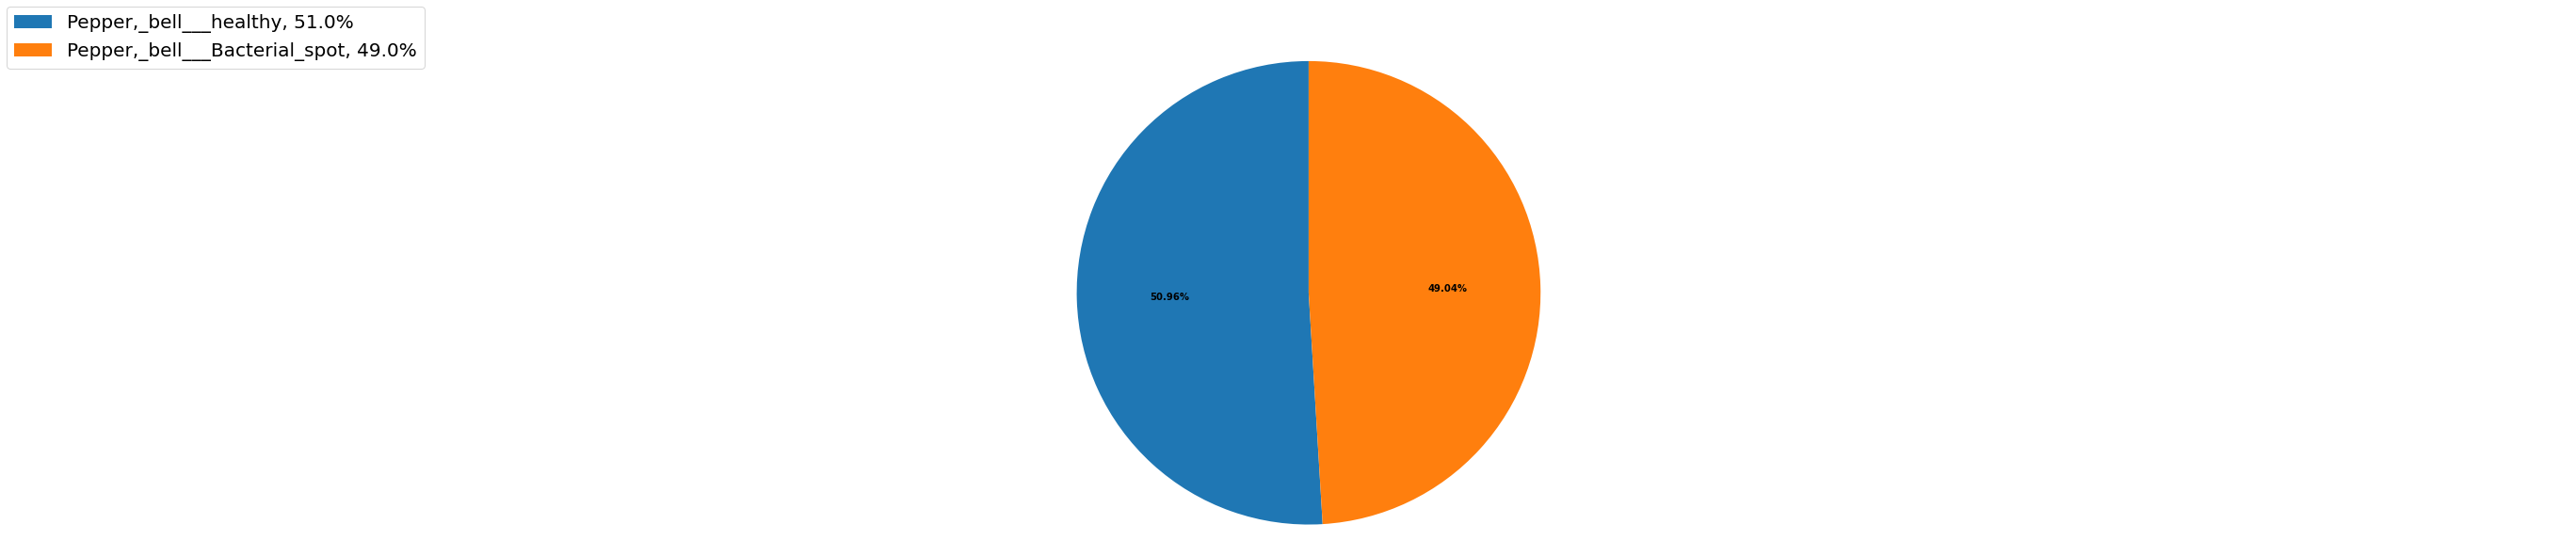

In [8]:
import matplotlib.pyplot as plt
import seaborn

train_cat_num = categories_percentage(train_dir)
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

#define Seaborn color palette to use
#palette_color = seaborn.color_palette('bright')
fig1, ax1 = plt.subplots(figsize=(6, 5))
box = box = ax1.get_position()
ax1.set_position([box.x0, box.y0-box.height, box.width * 8, box.height*2])
# plotting data on chart
_, _, autotexts = ax1.pie(
    train_cat_num.values(), autopct=autopct_generator(7), startangle=90, radius=4000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(train_cat_num.values())

plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(train_cat_num.keys(), train_cat_num.values())],
    prop={'size': 20},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

#plt.pie(train_cat_num.values(), labels=train_cat_num.keys(), colors=palette_color, autopct='%.0f%%')
  
# displaying chart
#plt.show()

In [9]:
import matplotlib.image as mpimg
w = 250
h = 250
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 4
num_choices = 20
# plot random images from train and validation dataset
# 'Potato___Late_blight'
def plot_category(folder_dir):
    fig = plt.figure(figsize=(15, 15))
    print(f'PLOTTING IMAGES IN {folder_dir}')
    random_train_image_directories = np.random.choice(os.listdir(os.path.join(train_dir,folder_dir)),num_choices)
    
    for i,img_dir in enumerate(random_train_image_directories):
        img = mpimg.imread(os.path.join(train_dir,folder_dir,img_dir))
        fig.add_subplot(rows, columns, i+1)
        imgplot = plt.imshow(img)
    plt.show()

<Figure size 1080x1080 with 0 Axes>

In [10]:
CLASS_NAMES = train_cat.copy()
#initialising necessary properties
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(10000/BATCH_SIZE)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
t =  f'{base_dir}/train'
v = f'{base_dir}/val'
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
# test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
# training data generator
train_generator = train_datagen.flow_from_directory(
        t,
        batch_size=BATCH_SIZE,
        shuffle=True,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        classes = list(CLASS_NAMES),
       # subset='training'
)
# validation data generator
validation_generator = test_datagen.flow_from_directory(
        v,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        classes = list(CLASS_NAMES),
        batch_size=BATCH_SIZE,
        #subset='training'
)

Found 3901 images belonging to 2 classes.
Found 975 images belonging to 2 classes.


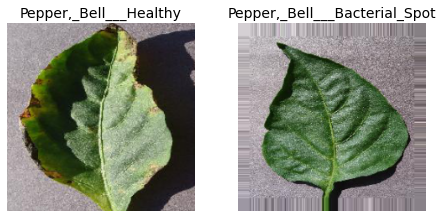

In [12]:
#vizualise the loaded images
def show_batch(image_batch, label_batch):
      fig = plt.figure(figsize=(20,20))
      fig.patch.set_facecolor('white')
      for n in range(2):
          ax = plt.subplot(5,5,n+1)
          plt.imshow(image_batch[n])
          plt.title(CLASS_NAMES[n].title(), fontsize=14)
          plt.axis('off')
image_batch, label_batch = next(train_generator)
show_batch(image_batch, label_batch)

In [13]:
#import model 
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [14]:
#initialise base model
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)
base_model = MobileNetV2(input_shape=IMG_SHAPE, input_tensor=None,
                                                include_top=False, 
                                                weights='imagenet')
# make the base feature extraction model trainable
base_model.trainable = True

2023-01-25 13:22:11.689769: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 13:22:11.791011: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 13:22:11.792043: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 13:22:11.794745: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

9420800/9406464 [==============================] - 0s 0us/step


In [15]:
import tensorflow as tf
#define model
model = tf.keras.Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(320, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(320, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
#compile model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), 
      loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), 
      metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 320)               409920    
_________________________________________________________________
dropout (Dropout)            (None, 320)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 320)               102720    
_________________________________________________________________
dropout_1 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6

In [16]:
epochs = 10

# Reduce learning rate when there is a change lesser than <min_delta> in <val_accuracy> for more than <patience> epochs
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 mode = 'max',
                                                 min_delta = 0.01,
                                                 patience = 3,
                                                 factor = 0.25,
                                                 verbose = 1,
                                                 cooldown = 0,
                                                 min_lr = 0.00000001)

# Stop the training process when there is a change lesser than <min_delta> in <val_accuracy> for more than <patience> epochs
early_stopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 mode = 'max',
                                                 min_delta = 0.005,
                                                 patience = 10,
                                                 verbose = 1,
                                                 restore_best_weights = True)

#  Save best model every epoch
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('.')
#fit the model
history = model.fit(train_generator, 
                    epochs=epochs,
                    validation_data = validation_generator,
                    callbacks=[early_stopper, reduce_lr,model_checkpoint])

2023-01-25 13:22:16.961520: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '
2023-01-25 13:22:21.905365: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


122/122 [==============================] - 81s 582ms/step - loss: 0.2062 - accuracy: 0.9110 - val_loss: 2.6189 - val_accuracy: 0.5149


2023-01-25 13:23:48.642902: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
122/122 [==============================] - 55s 452ms/step - loss: 0.0387 - accuracy: 0.9864 - val_loss: 3.2914 - val_accuracy: 0.5149


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/10
122/122 [==============================] - 56s 455ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 3.4262 - val_accuracy: 0.5179


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/10
122/122 [==============================] - 56s 457ms/step - loss: 0.0123 - accuracy: 0.9967 - val_loss: 3.5736 - val_accuracy: 0.5200

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/10
122/122 [==============================] - 55s 448ms/step - loss: 0.0098 - accuracy: 0.9974 - val_loss: 3.1760 - val_accuracy: 0.5395


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 6/10
122/122 [==============================] - 55s 449ms/step - loss: 0.0077 - accuracy: 0.9972 - val_loss: 2.7292 - val_accuracy: 0.5610


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 7/10
122/122 [==============================] - 55s 454ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 2.4423 - val_accuracy: 0.5774


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 8/10
122/122 [==============================] - 56s 454ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 2.0168 - val_accuracy: 0.6185


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 9/10
122/122 [==============================] - 55s 451ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 1.7515 - val_accuracy: 0.6513


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 10/10
122/122 [==============================] - 55s 450ms/step - loss: 0.0111 - accuracy: 0.9954 - val_loss: 1.4002 - val_accuracy: 0.7087


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


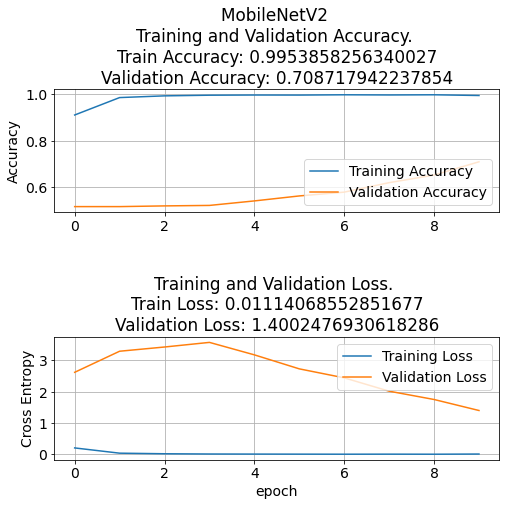

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#plot results
#accuracy
plt.figure(figsize=(8, 8))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'MobileNetV2 \nTraining and Validation Accuracy. \nTrain Accuracy: {str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

#loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss: {str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()

In [18]:
# save the model 
saved_model = tf.keras.models.load_model('.')
file_h5 = "pepper_model_1.h5"
tf.keras.models.save_model(saved_model, file_h5)

In [19]:
# Tune some parts like learning rate and momentum
# momentum = 0.8
# learning_rate = 0.002
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8), 
      loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), 
      metrics=['accuracy'])

In [20]:
history = model.fit(train_generator, 
                    epochs=epochs,
                    validation_data = validation_generator,
                    callbacks=[early_stopper, reduce_lr,model_checkpoint])

Epoch 1/10


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


122/122 [==============================] - 60s 459ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.9822 - val_accuracy: 0.7856


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
122/122 [==============================] - 54s 441ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.9216 - val_accuracy: 0.7928


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/10
122/122 [==============================] - 56s 456ms/step - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.8351 - val_accuracy: 0.8174


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/10
122/122 [==============================] - 55s 450ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.7301 - val_accuracy: 0.8349


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/10
122/122 [==============================] - 55s 451ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.3863 - val_accuracy: 0.8862


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 6/10
122/122 [==============================] - 55s 453ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.2007 - val_accuracy: 0.9272


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 7/10
122/122 [==============================] - 55s 450ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.1820 - val_accuracy: 0.9436


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 8/10
122/122 [==============================] - 55s 452ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.1115 - val_accuracy: 0.9682


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 9/10
122/122 [==============================] - 55s 453ms/step - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.0484 - val_accuracy: 0.9867


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 10/10
122/122 [==============================] - 55s 448ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0382 - val_accuracy: 0.9908


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [21]:
# save the model 
saved_model = tf.keras.models.load_model('.')
file_h5 = "pepper_model_2.h5"
tf.keras.models.save_model(saved_model, file_h5)

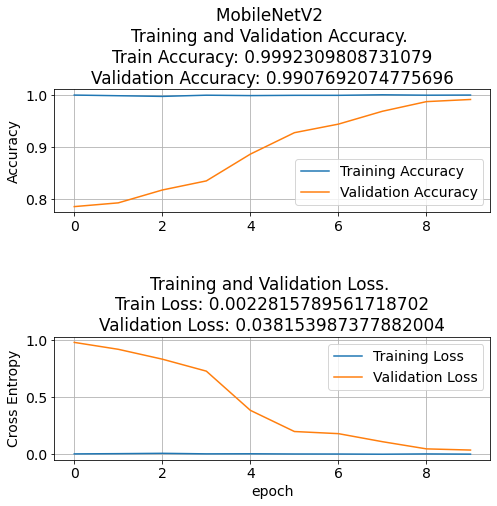

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#plot results
#accuracy
plt.figure(figsize=(8, 8))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'MobileNetV2 \nTraining and Validation Accuracy. \nTrain Accuracy: {str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

#loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss: {str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()

In [23]:
# Tune some parts like learning rate and momentum
# momentum = 0.7
# learning_rate = 0.003
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.003, momentum=0.7), 
      loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), 
      metrics=['accuracy'])

In [24]:
history = model.fit(train_generator, 
                    epochs=epochs,
                    validation_data = validation_generator,
                    callbacks=[early_stopper, reduce_lr,model_checkpoint])

Epoch 1/10


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


122/122 [==============================] - 59s 453ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0522 - val_accuracy: 0.9867


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
122/122 [==============================] - 55s 451ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0538 - val_accuracy: 0.9877


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/10
122/122 [==============================] - 55s 449ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0180 - val_accuracy: 0.9949


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/10
122/122 [==============================] - 55s 448ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 0.9949

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.000750000006519258.


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/10
122/122 [==============================] - 55s 448ms/step - loss: 7.1831e-04 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 0.9949


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 6/10
122/122 [==============================] - 55s 450ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0101 - val_accuracy: 0.9969


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 7/10
122/122 [==============================] - 55s 447ms/step - loss: 0.0016 - accuracy: 0.9992 - val_loss: 0.0095 - val_accuracy: 0.9969


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 8/10
122/122 [==============================] - 56s 455ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0073 - val_accuracy: 0.9979


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 9/10
122/122 [==============================] - 54s 444ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0074 - val_accuracy: 0.9979

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0001875000016298145.


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 10/10
122/122 [==============================] - 56s 455ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0057 - val_accuracy: 0.9979


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [25]:
# save the model 
saved_model = tf.keras.models.load_model('.')
file_h5 = "pepper_model_3.h5"
tf.keras.models.save_model(saved_model, file_h5)

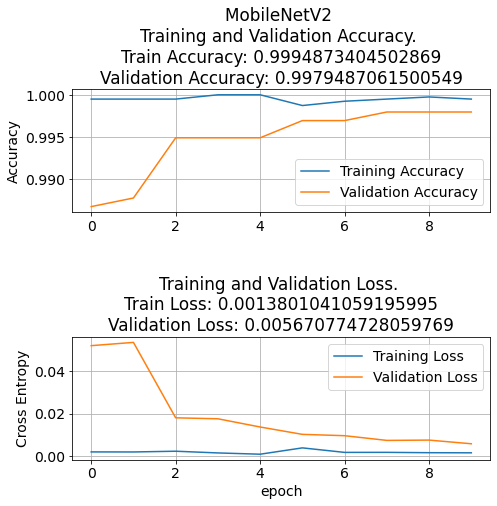

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#plot results
#accuracy
plt.figure(figsize=(8, 8))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'MobileNetV2 \nTraining and Validation Accuracy. \nTrain Accuracy: {str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

#loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss: {str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()